# Forecasting mit Prophet - Basics

Lade die benötigten Python-Packages:

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

INFO:matplotlib.font_manager:font search path ['/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf', '/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/afm', '/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
INFO:matplotlib.font_manager:Could not open font file /Library/Fonts/NISC18030.ttf
INFO:matplotlib.font_manager:generated new fontManager
ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


Lade die Daten als pandas-Dataframe:

In [2]:
df = pd.read_csv('../Data/airline_passengers.csv')

Verschaffe dir einen Überblick über die Daten:

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail()

,Month,Thousands of Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


Überführe das Dataframe in das Prophet-Format:

In [5]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


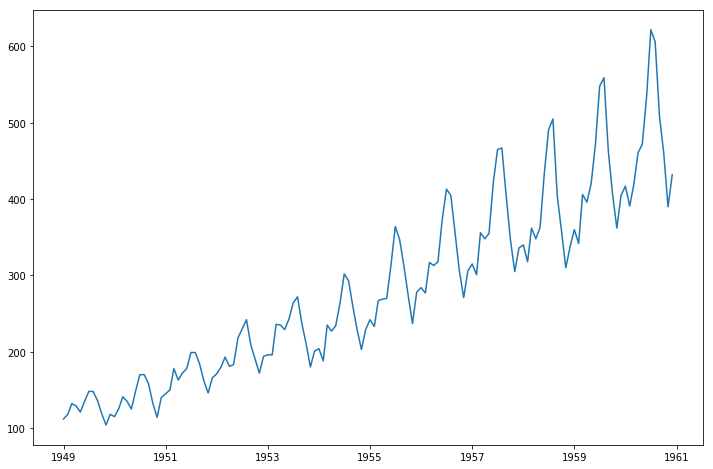

In [6]:
fig = plt.figure(figsize=(12,8))
plt.plot(df['ds'], df['y'])
plt.show()

Erstellen einen Forecast mit Prophet:

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds
0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
5   1949-06-01
6   1949-07-01
7   1949-08-01
8   1949-09-01
9   1949-10-01
10  1949-11-01
11  1949-12-01
12  1950-01-01
13  1950-02-01
14  1950-03-01
15  1950-04-01
16  1950-05-01
17  1950-06-01
18  1950-07-01
19  1950-08-01
20  1950-09-01
21  1950-10-01
22  1950-11-01
23  1950-12-01
24  1951-01-01
25  1951-02-01
26  1951-03-01
27  1951-04-01
28  1951-05-01
29  1951-06-01
..         ...
162 1962-07-01
163 1962-08-01
164 1962-09-01
165 1962-10-01
166 1962-11-01
167 1962-12-01
168 1963-01-01
169 1963-02-01
170 1963-03-01
171 1963-04-01
172 1963-05-01
173 1963-06-01
174 1963-07-01
175 1963-08-01
176 1963-09-01
177 1963-10-01
178 1963-11-01
179 1963-12-01
180 1964-01-01
181 1964-02-01
182 1964-03-01
183 1964-04-01
184 1964-05-01
185 1964-06-01
186 1964-07-01
187 1964-08-01
188 1964-09-01
189 1964-10-01
190 1964-11-01
191 1964-12-01

[192 rows x 1 columns]


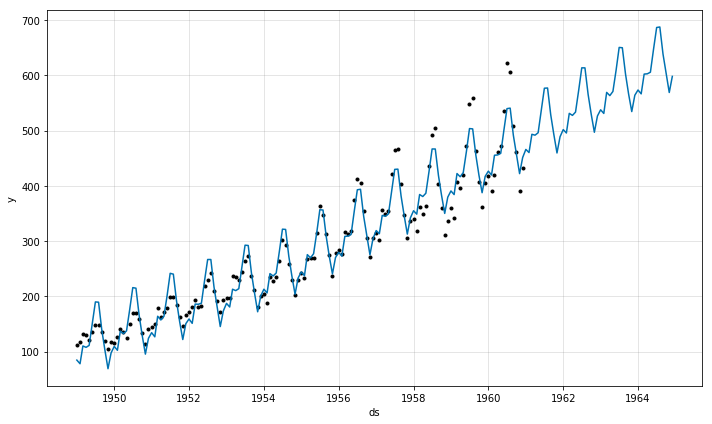

In [7]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(48, freq='MS')
print(future)
forecast = m.predict(future)
fig = m.plot(forecast, uncertainty=False)

Zeige die Komponenten des Regressions-Modells an:

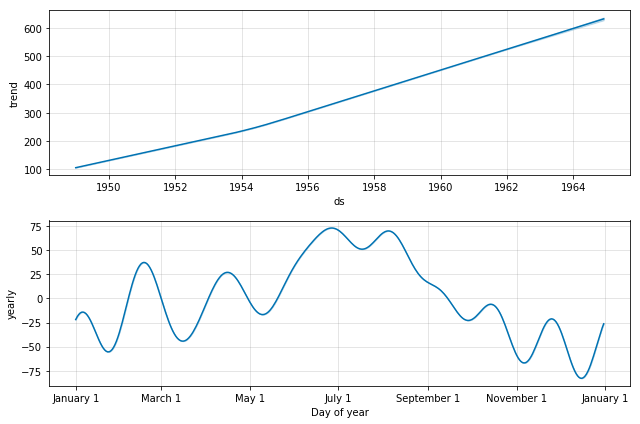

In [8]:
fig = m.plot_components(forecast)

Zeige Changepoints bzgl. des Trends an:

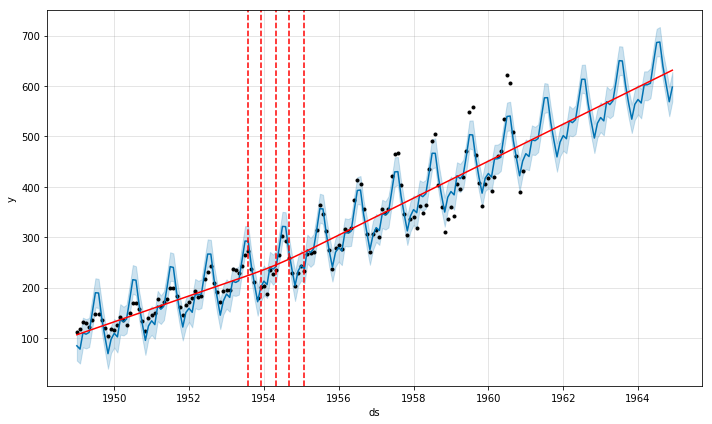

In [9]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Das saisonale Verhalten ist nicht konstant, sondern wächst mit dem Trend. Dies kann man bei Modellierung wie folgt berücksichtigen:

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


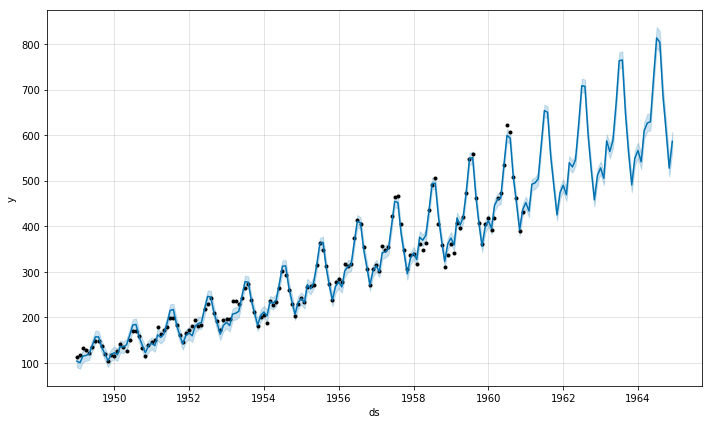

In [10]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

Die Komponenten und Changepoints sehen dann so aus:

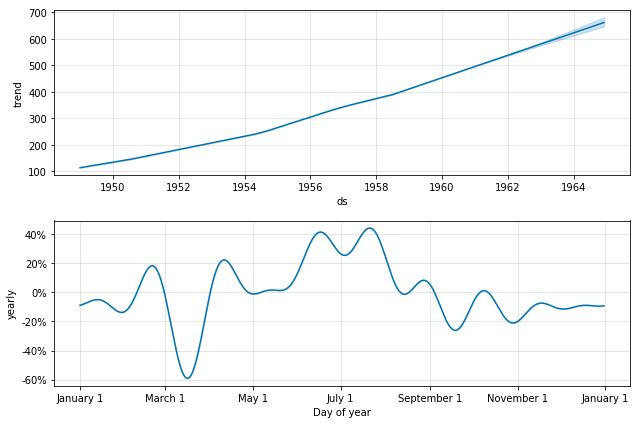

In [11]:
fig = m.plot_components(forecast)

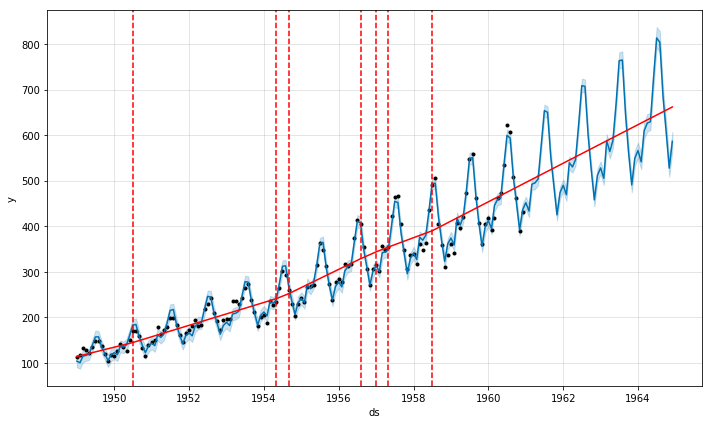

In [12]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)